In [22]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [72]:
data = pd.read_csv('ml1data.train.txt',header=None)

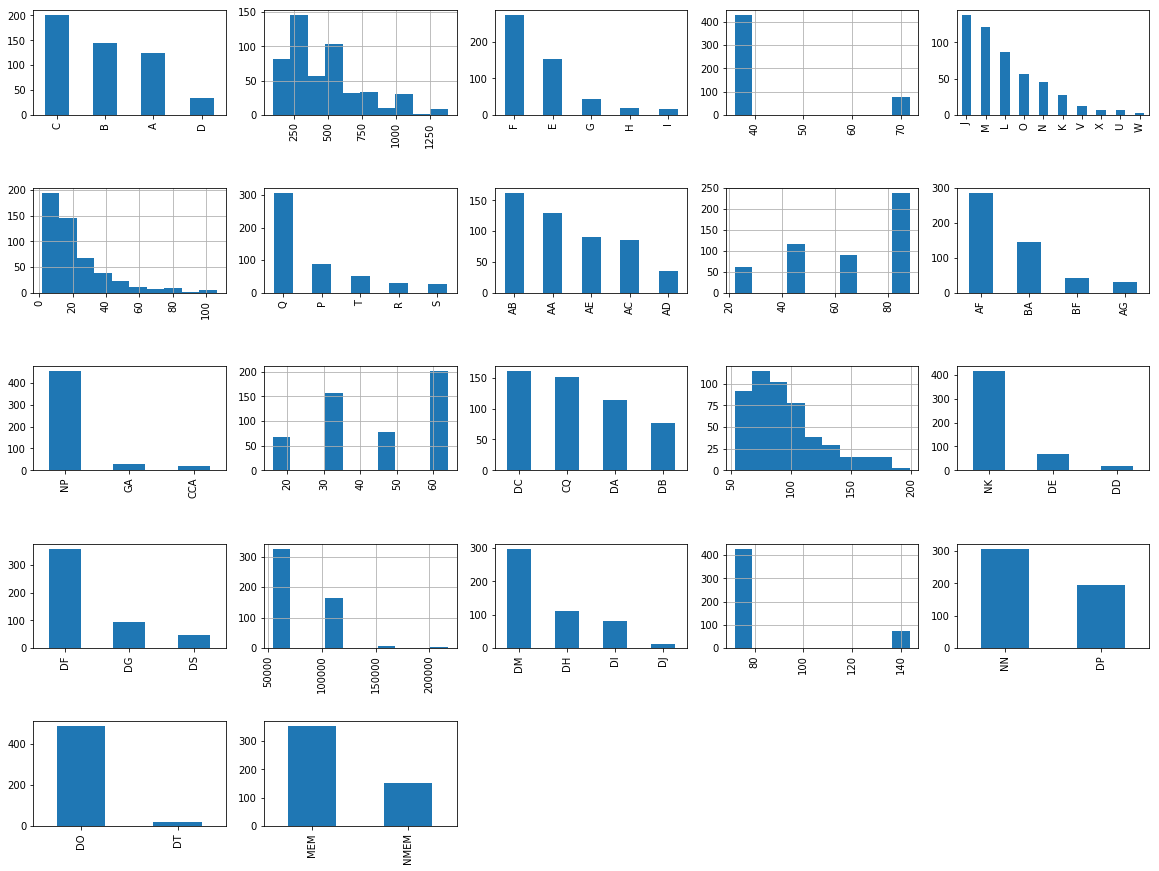

In [73]:
import matplotlib.pyplot as plt 
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(data.shape[1]) / cols)
for i in data.columns:
    ax = fig.add_subplot(rows, cols, i + 1)
    if data.dtypes[i] == np.object:
        data[i].value_counts().plot(kind="bar", axes=ax)
    else:
        data[i].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

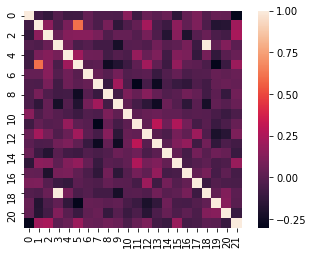

In [74]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [75]:
del data[3]

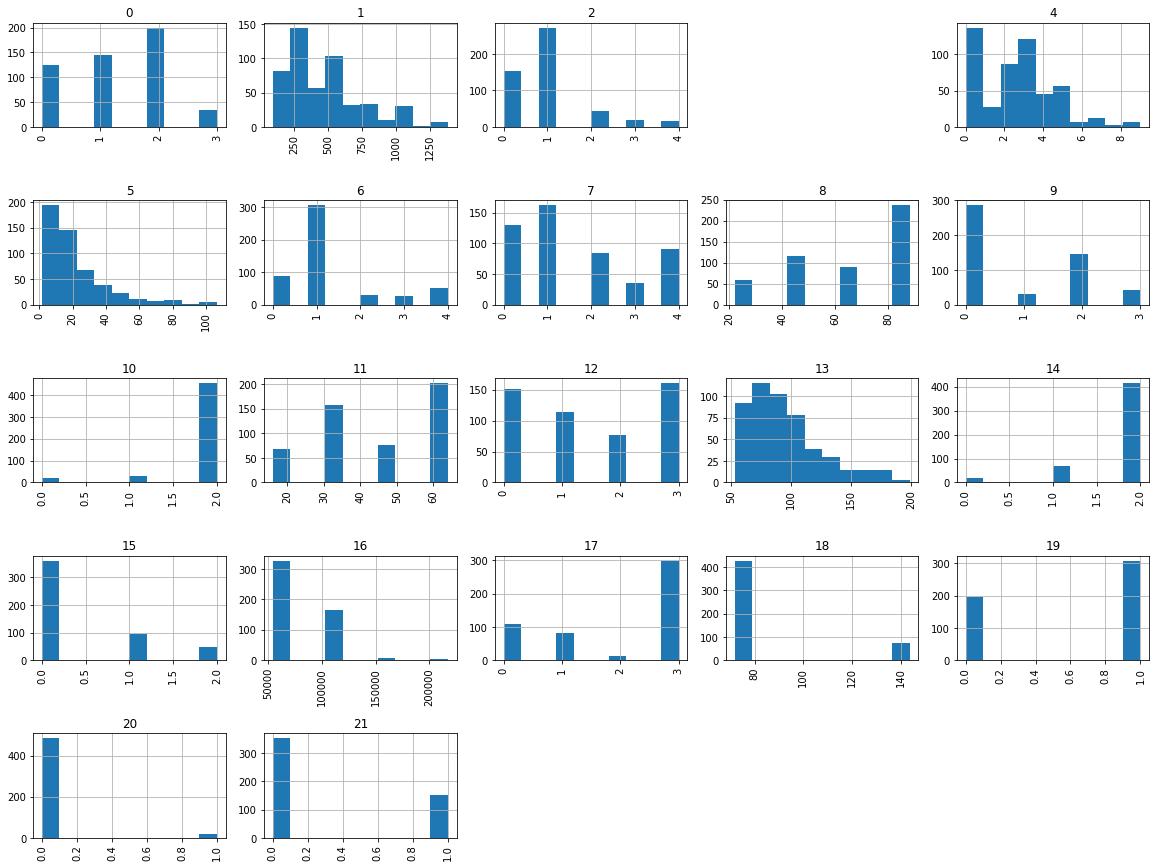

In [76]:
encoded_data, encoders = number_encode_features(data)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i in encoded_data.columns:
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(i)
    encoded_data[i].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [77]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data.iloc[:,0:20], encoded_data[21], train_size=0.90)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float"))

In [78]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 20
num_trees = 100
max_features = 11
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, encoded_data.iloc[:,0:20], encoded_data[21], cv=kfold)
print(results.mean())

0.741450980392


F1 score: 0.444444


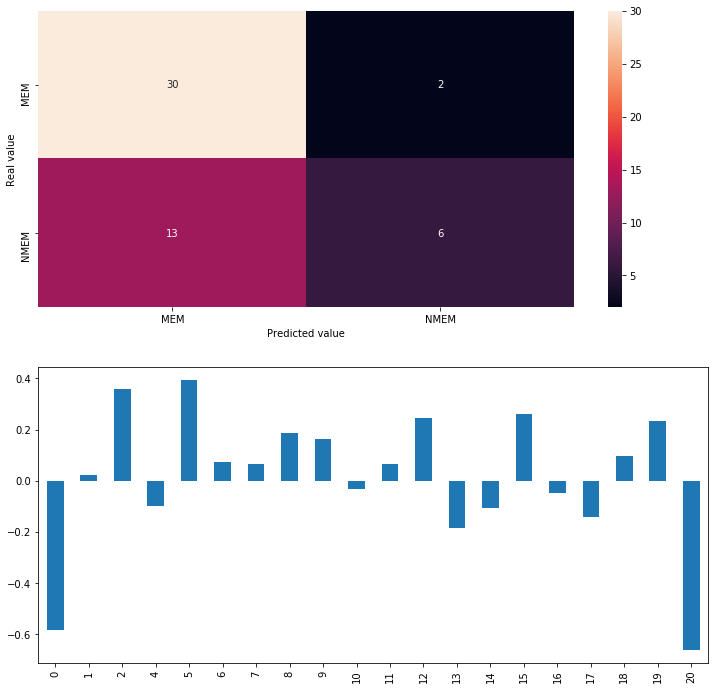

In [79]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders[21].classes_, yticklabels=encoders[21].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
#gnb = GaussianNB()
#gnb = BernoulliNB()
#gnb = MultinomialNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders[21].classes_, yticklabels=encoders[21].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()

ValueError: Input X must be non-negative

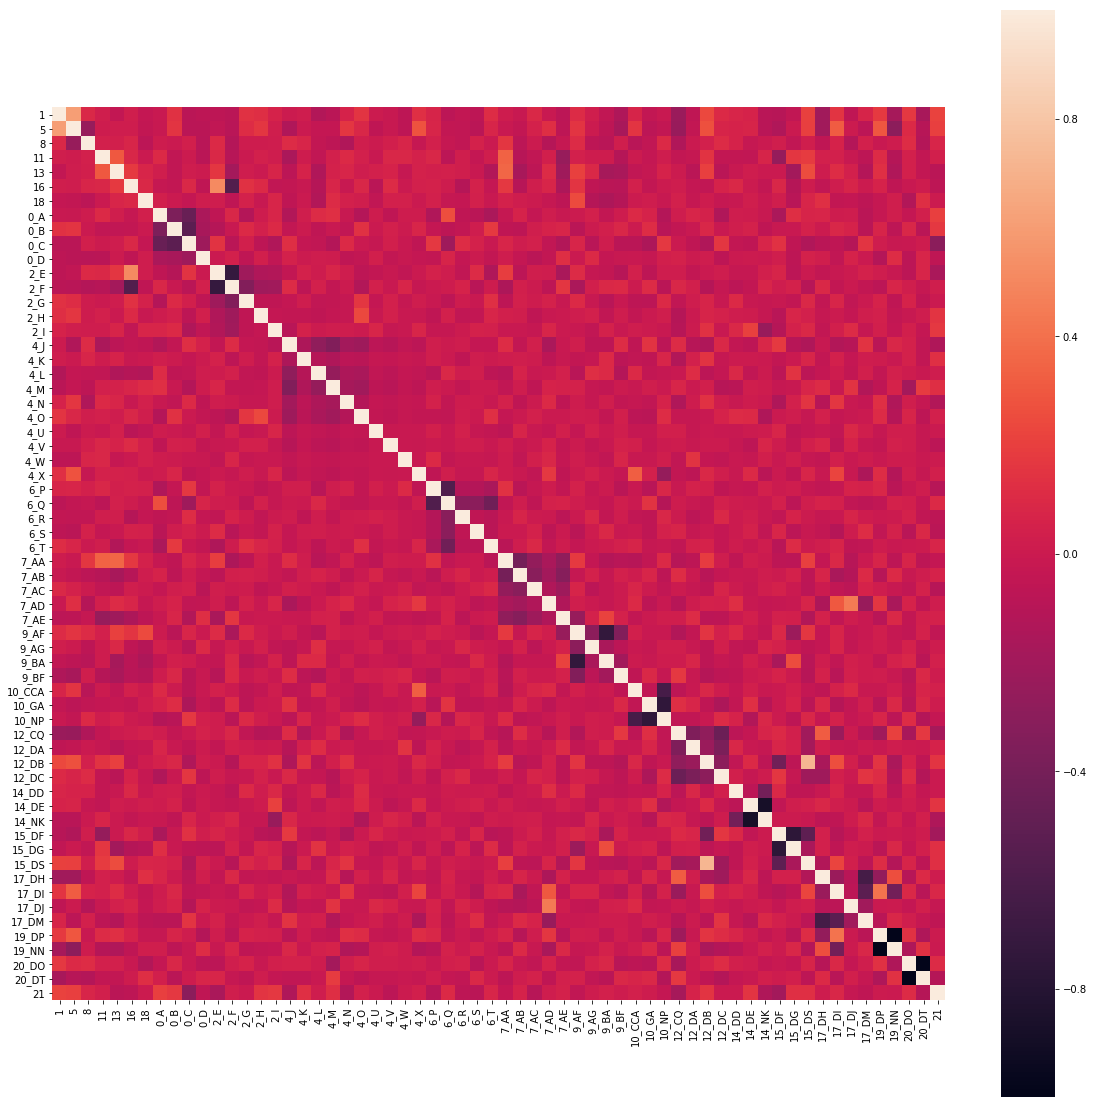

In [80]:
binary_data = pd.get_dummies(data)

# Let's fix the Target as it will be converted to dummy vars too
binary_data[21]= binary_data["21_NMEM"]
del binary_data["21_MEM"]
del binary_data["21_NMEM"]
plt.subplots(figsize=(20,20))
sns.heatmap(binary_data.corr(), square=True)
plt.show()

In [81]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(binary_data.iloc[:,0:60], binary_data.iloc[:,61], train_size=0.90)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

In [94]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 20
num_trees = 100
max_features = 14
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, binary_data.iloc[:,0:60], binary_data.iloc[:,61], cv=kfold)
print(results.mean())

0.725764705882


F1 score: 0.482759


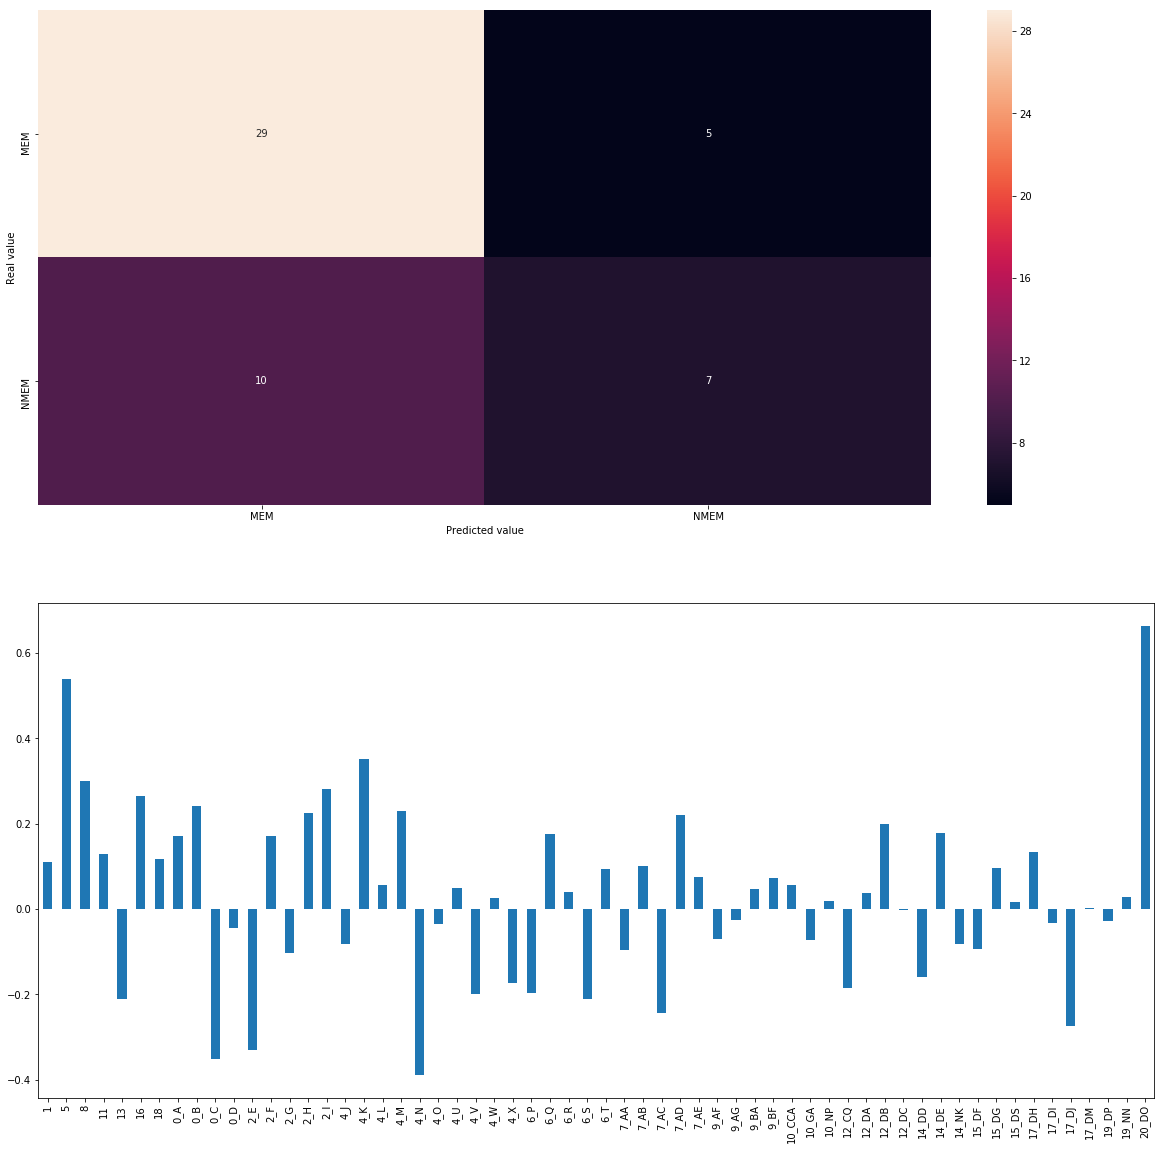

In [84]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders[21].classes_, yticklabels=encoders[21].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values()
ax = plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()